# Topic : Neural Network for Image Classification  
## Objective for this template:

1. To introduce participants to the basic pipeline for Image classification using a multinomial logistic regression.
2. Use tensorflow to build a simple sequential neural network that implements a multinomial logistic regression.
3. Demonstrate the process of training the model and evaluating its performance

Designed By: _Rodolfo C. Raga Jr._  __Copyright @2021__

__Permission granted to use template for educational purposes so long as this heading is not removed.__
---

**Step 1**: 

In [3]:
#KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1

from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

**Step 2**: Setup directory for raw and resized data

In [61]:
path1 = "/content/gdrive/My Drive/input_data"    #path of folder of images    
path2 = "/content/gdrive/My Drive/resized_data"  #path of folder to save images  
print("Directory path is set")

Directory path is set


**Step 3** : Check number of raw images stored in input directory


In [62]:
listing = os.listdir(path1) 
num_samples=size(listing)
print ("Total number of raw images is {}".format(num_samples))

Total number of rw images s 80


**Step 4**: Resize images and convert to grayscale

In [64]:
for file in listing:
    im = Image.open(path1 + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here           
    gray.save(path2 +'/' +  file, "JPEG")

imlist = os.listdir(path2)
print ("Raw images converted to following filenames {}".format(imlist))

Raw images converted to following filenames ['Comfort_002.jpg', 'Comfort_003.jpg', 'Comfort_007.jpg', 'Comfort_004.jpg', 'Comfort_009.jpg', 'Comfort_005.jpg', 'Comfort_008.jpg', 'Comfort_001.jpg', 'Comfort_010.jpg', 'Comfort_006.jpg', 'Comfort_019.jpg', 'Comfort_017.jpg', 'Comfort_018.jpg', 'Comfort_016.jpg', 'Comfort_013.jpg', 'Comfort_014.jpg', 'Comfort_020.jpg', 'Comfort_011.jpg', 'Comfort_012.jpg', 'Comfort_015.jpg', 'discomfort_020.JPG', 'discomfort_015.JPG', 'discomfort_017.JPG', 'discomfort_014.JPG', 'discomfort_018.JPG', 'discomfort_013.JPG', 'discomfort_019.JPG', 'discomfort_012.JPG', 'discomfort_016.JPG', 'discomfort_008.JPG', 'discomfort_007.JPG', 'discomfort_009.JPG', 'discomfort_011.JPG', 'discomfort_010.JPG', 'discomfort_005.JPG', 'discomfort_003.JPG', 'discomfort_004.JPG', 'discomfort_006.JPG', 'discomfort_002.JPG', 'discomfort_001.JPG', 'distressed_017.JPG', 'distressed_020.JPG', 'distressed_019.JPG', 'distressed_013.JPG', 'distressed_018.JPG', 'distressed_015.JPG', 'di

**Step 5** : Check number of resized images for use as input

In [65]:
im1 = array(Image.open(path2 + '/'+ imlist[0])) 
# open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

print(imnbr)
print ("Total number of processed images is {}".format(imnbr))

80
Total number of processed images is 80


**Step 6**: Apply one hot encoding and generate label the images

In [72]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ '/' + im2)).flatten() for im2 in imlist],'f')

print("Matrix shape is {}".format(immatrix.shape))
print(immatrix)
                
label=np.ones((num_samples,),dtype = int)
label[0:20]=0
label[20:40]=1
label[40:]=2

print("Label shape is {}".format(label.shape))
print(label)


Matrix shape is (80, 40000)
[[  3.   4.   4. ... 154. 156. 154.]
 [255. 255. 255. ... 244. 244. 244.]
 [227. 227. 227. ... 232. 231. 230.]
 ...
 [237. 237. 237. ... 184. 181. 179.]
 [237. 237. 237. ... 245. 246. 247.]
 [217. 217. 218. ... 222. 210. 198.]]
Label shape is (80,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


**Step 7**: Attach labels to data matrix

[array([[243., 241., 237., ..., 168., 173., 178.],
       [255., 255., 255., ..., 246., 246., 246.],
       [255., 255., 255., ..., 253., 255., 255.],
       ...,
       [179., 175., 170., ..., 216., 216., 216.],
       [227., 228., 230., ..., 242., 241., 241.],
       [224., 223., 221., ..., 207., 207., 206.]], dtype=float32), array([1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2])]


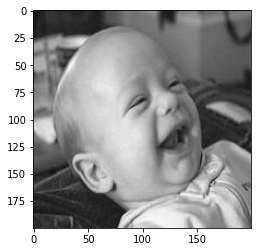

In [75]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data)



**Step 8**: Generate training and testing data

In [82]:
(X, y) = (train_data[0],train_data[1])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('X_train :', X_train)
print('y_train :', y_train)
print('X_test :', X_test)
print('y_test :', y_test)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

[[243. 241. 237. ... 168. 173. 178.]
 [255. 255. 255. ... 246. 246. 246.]
 [255. 255. 255. ... 253. 255. 255.]
 ...
 [179. 175. 170. ... 216. 216. 216.]
 [227. 228. 230. ... 242. 241. 241.]
 [224. 223. 221. ... 207. 207. 206.]]
[1 1 1 2 2 2 2 2 1 0 1 1 2 0 2 2 2 0 1 2 2 2 1 2 1 0 2 2 0 2 0 0 1 2 2 0 2
 0 2 2 0 2 2 1 2 0 2 0 0 2 0 2 0 2 2 1 0 0 1 2 1 2 2 2 2 0 1 1 1 1 2 2 2 1
 0 2 1 2 0 2]
X_train : [[175. 184. 189. ... 250. 246. 243.]
 [181. 181. 181. ... 200. 203. 204.]
 [ 45.  45.  42. ... 142. 139. 138.]
 ...
 [143. 132. 108. ... 233. 233. 233.]
 [142. 141. 135. ...  66.  65.  68.]
 [244. 244. 243. ... 172. 169. 168.]]
y_train : [2 2 2 2 1 0 2 2 0 1 1 1 2 1 2 1 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 1 2 2 2 1 0
 2 2 1 2 0 1 1 2 2 1 2 0 2 2 0 2 0 2 0 1 0 0 2 1 1 1 2]
X_test : [[206. 208. 211. ...  46.  89. 152.]
 [228. 228. 228. ... 231. 230. 229.]
 [167. 168. 163. ...  64.  66.  67.]
 ...
 [ 18.  19.  20. ...  97.  71.  73.]
 [222. 217. 209. ... 245. 240. 236.]
 [186. 187. 188. ... 229. 229.

**Step 9**: Convert output to categorical form and test input data

[2 2 2 2 1 0 2 2 0 1 1 1 2 1 2 1 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 1 2 2 2 1 0
 2 2 1 2 0 1 1 2 2 1 2 0 2 2 0 2 0 2 0 1 0 0 2 1 1 1 2]
[1 2 1 2 2 1 1 2 2 0 2 0 2 2 2 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1

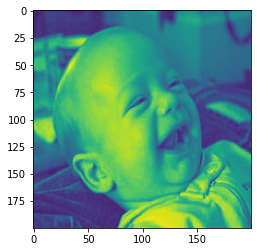

In [93]:
print(y_train)
print(y_test)
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(Y_train)
print(Y_test)


i = 10
img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
print("label of this image is: ", Y_train[i,:])

**Step 10.1** Using Feedforward NN model

In [89]:
model = tf.keras.Sequential()

layer_0 = tf.keras.layers.Flatten(input_shape=(1, img_rows, img_cols))
layer_1 = tf.keras.layers.Dense(units=128, activation="relu")
layer_2 = tf.keras.layers.Dense(units=128, activation="relu")
layer_3 = tf.keras.layers.Dense(units=128, activation="relu")
layer_4 = tf.keras.layers.Dense(units=10, activation="softmax")

model.add(layer_0)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.summary()
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               5120128   
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 5,154,442
Trainable params: 5,154,442
Non-trainable params: 0
_________________________________________________________________


**Step 10.2**: Using Convolutional Neural Network model 

In [105]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, border_mode='valid', input_shape=(img_rows, img_cols, 1))) #, activation = 'relu', data_format='channels_first'))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


**Step 12**: Train the model and gather training history data

In [95]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 7s 112ms/step - loss: 1.0909 - accuracy: 0.3750 - val_loss: 1.0642 - val_accuracy: 0.6250
Epoch 2/20
64/64 [==============================] - 7s 102ms/step - loss: 1.0852 - accuracy: 0.3125 - val_loss: 1.0624 - val_accuracy: 0.6250
Epoch 3/20
64/64 [==============================] - 7s 103ms/step - loss: 1.0820 - accuracy: 0.3750 - val_loss: 1.0610 - val_accuracy: 0.6250
Epoch 4/20
64/64 [==============================] - 7s 102ms/step - loss: 1.1044 - accuracy: 0.3906 - val_loss: 1.0598 - val_accuracy: 0.6250
Epoch 5/20
64/64 [==============================] - 7s 102ms/step - loss: 1.0908 - accuracy: 0.4375 - val_loss: 1.0589 - val_accuracy: 0.6250
Epoch 6/20
64/64 [==============================] - 7s 104ms/step - loss: 1.0935 - accuracy: 0.4375 - val_loss: 1.0577 - val_accuracy: 0.6250
Epoch 7/20
64/64 [==============================] - 7s 102ms/step - loss: 1.0942 - accuracy: 0.2812 - va

**Step 13**: Display results of performance assessment metrics

In [103]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred = model.predict_classes(X_test)
print(Y_pred)
#y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class 0(Comfort)', 'class 1(Discomfort)', 'class 2(HORSES)']
print("Performance report: \n",classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print("Confusion Matrix: \n",confusion_matrix(np.argmax(Y_test,axis=1), y_pred))



['loss', 'accuracy']
[1.0446850061416626, 0.625]
Test loss: 1.0446850061416626
Test accuracy: 0.625
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Performance report: 
                      precision    recall  f1-score   support

   class 0(Comfort)       0.12      1.00      0.22         2
class 1(Discomfort)       0.00      0.00      0.00         4
    class 2(HORSES)       0.00      0.00      0.00        10

           accuracy                           0.12        16
          macro avg       0.04      0.33      0.07        16
       weighted avg       0.02      0.12      0.03        16

Confusion Matrix: 
 [[ 2  0  0]
 [ 4  0  0]
 [10  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Other things we can do:**

Analyze training statistics

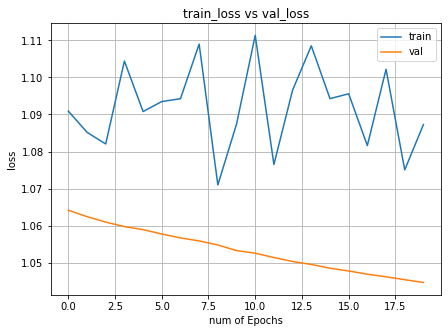

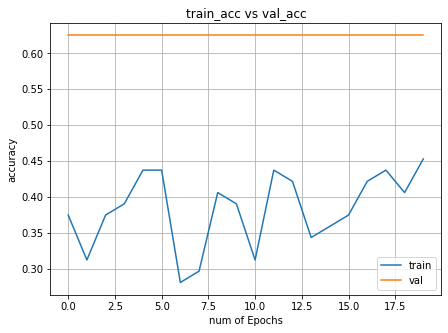

In [104]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print (plt.style.available # use bmh, classic,ggplot for big pictures)
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])
